In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import nltk

import warnings
warnings.filterwarnings("ignore")

import prepare as p
import explore as e

# Personas

## Process

1) Create an 'overall' persona using the entire dataframe to surve as a control group and measure of the overall<br>
2) Choose a personal characteristic feature you want to explore<br>
3) Create a persona for each adaquetly represented value in that feature using only rows with that value<br>
4) Compare the 'overall' persona and the 'value' personas to see how changind the value in your explored feature changes the other values in the persona<br>
5) Record takeaways<br>
6) Choose a new feature to explore<br>

**Process for creating a persona is outlined below**

## Persona Outline

### Personal Characteristics
1) Race/Ethnicity <br>
* We have resonable counts to look as white, black, asian, and hispanic.

2) Gender Identity <br>
* Probly not a good feature to use only 6/712 are not women

3) Zipcode<br>
* 235 distinct values, tieing these codes together into neighborhoods could give us some info and help tell a story

4) pregnancy_stage<br>
* Uneven distribution (Way more at one year). Odd to include as part of a persona. First trimester and care giver are low sample sizes. Recomend looking at latter to see if needs differ at different stages but not to include in the personas

5) Income<br>
* Higher income is overepresented. Adequate sample sizes for each veriable. One row needs to be combined with 40,000 and under. Could use mode salary for neighberhood to fill nulls.

6) Micarrage<br>
* True value not adequate sample size, suggest dropping the feature

**Use these**

* Race/Ethnicity
* Location by "neighborhood"
* Income

### Primary Concerns Quantitative
* Distribution of financial and overall wellbeing 
* q6 list top X most frequently identified needs

* Unsure what duration is or how it applies???

### Primary Concerns Qualitative
* Many many null values
* use theme extraction to identify labels to help sort respnces
* use bag of words to identify ngrams in responces to look for common phrases
* Still working on this part


### Summary Quotation - Nice to have
* Quote from Qualitative data that is representitive of the group in question. 

In [2]:
df = pd.read_excel('survey_data.xlsx')

df.head()

,respondent_id,collector_id,start,end,zip,q01_overall,q01_overall_open,q02_financial,q02_financial_open,q03_pregnancy_open,...,q06_support_none,q06_support_other,q08_hispanic,q09_gender,q11_open,duration,pregnancy_stage,miscarriage,race,income
0,12488725288,399921329,2021-03-13 12:23:16,2021-03-13 12:31:36,20124,1.0,NaN,1.0,NaN,Understanding transmission of COVID 19 and how...,...,NaN,NaN,No,Woman,The support we had while in the maternity ward...,-9,1 year,False,White,"125,001 and over"
1,124886789,399921329,2021-03-13 11:48:18,2021-03-13 11:51:46,22191,2.0,NaN,2.0,NaN,How the vaccine affects both pregnancy and pos...,...,NaN,NaN,No,Woman,NaN,-4,3rd trimester,False,Black,"100,001 - 125,000"
2,124884534,399921329,2021-03-13 09:25:30,2021-03-13 09:37:07,22181,1.0,NaN,1.0,NaN,Get Covid and be hospitalized.,...,NaN,NaN,Yes,Woman,"Because of COVID, my husband hasn�t been avail...",-12,3rd trimester,False,White,"100,001 - 125,000"
3,12488374327,399921329,2021-03-13 08:04:15,2021-03-13 08:19:41,22601,1.0,Covid doesn't scare me; I think masks are unne...,1.0,NaN,I hate all of the restrictions--I had to quara...,...,NaN,NaN,No,Woman,NaN,-16,1 year,False,White,"40,001 - 75,000"
4,12488363511,399921329,2021-03-13 07:56:08,2021-03-13 08:00:58,22304,2.0,NaN,1.0,No impact,Becoming sick with COVID and being unable to c...,...,NaN,NaN,No,Woman,NaN,-5,1 year,False,White,"125,001 and over"


In [3]:
df.shape

(712, 37)

## Examining available personal characteristics for fitness in persona description

In [4]:
df[['race', 'q09_gender', 'zip', 'pregnancy_stage', 'income', 'miscarriage']] .isnull().sum()

race                0
q09_gender         87
zip                14
pregnancy_stage     0
income             96
miscarriage         0
dtype: int64

## Race

In [5]:
df.race.value_counts()

White                 512
Undisclosed            90
Black                  41
Asian                  36
Multiracial            21
Hispanic or Latino      6
American Indian         3
Pacific Islander        3
Name: race, dtype: int64

**We have resonable counts to look as white, black, and asian. If we want to look at hispanic/latino we may need to reconfigure the data and use this as a seperate variable.**

## Hispanic

In [6]:
df.q08_hispanic.value_counts()

No     585
Yes     40
Name: q08_hispanic, dtype: int64

**Sample size appears adaquite**

## Gender Identity

In [7]:
df.q09_gender.value_counts()

Woman                                  619
Man                                      4
Not specified above, please specify      2
Name: q09_gender, dtype: int64

**Probly not a good catagory to use only 6/712 are not wemon**

## Zipcode

In [8]:
df.zip.value_counts()

23225    15
22701    14
22191    13
23227    11
22801    11
         ..
20695     1
22747     1
43230     1
22213     1
0         1
Name: zip, Length: 253, dtype: int64

**235 distinct values, tieing these codes together into neighborhoods could give us some info and help tell a story**

In [9]:
df.pregnancy_stage.value_counts()

1 year           416
3rd trimester     90
2 years           74
2nd trimester     62
multi             46
1st trimester     14
caregiver         10
Name: pregnancy_stage, dtype: int64

<AxesSubplot:title={'center':'Distribution of Stage Data'}>

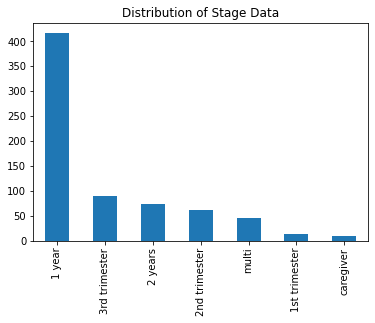

In [10]:
df.pregnancy_stage.value_counts().plot(kind='bar', title="Distribution of Stage Data")

**Uneven distribution (Way more at one year). Odd to include as part of a persona. First trimester and care giver are low sample sizes. Recomend looking at latter to see if needs differ at different stages but not to include in the personas.** 

## Income

In [11]:
df.income.value_counts()

125,001 and over     238
75,001 - 100,000     115
100,001 - 125,000    105
40,001 - 75,000      104
40,000 and under      53
$40,000 or under       1
Name: income, dtype: int64

<AxesSubplot:title={'center':'Distribution of Income'}>

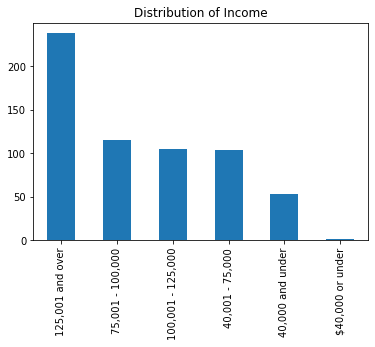

In [12]:
df.income.value_counts().plot(kind='bar', title="Distribution of Income")

**Higher income is overepresented. Adequate sample sizes for each veriable. One row needs to be combined with 40,000 and under.Could use mode salary for neighberhood to fill nulls.**

## Micarriage

In [13]:
df.miscarriage.value_counts()

False    708
True       4
Name: miscarriage, dtype: int64

**True value not adequate sample size, suggest dropping the feature**

## Examining quantitative data for fitness in persona description

In [14]:
df.columns

Index(['respondent_id', 'collector_id', 'start', 'end', 'zip', 'q01_overall',
       'q01_overall_open', 'q02_financial', 'q02_financial_open',
       'q03_pregnancy_open', 'q04_feeding_open', 'q05_needs_1st',
       'q05_needs_2nd', 'q05_needs_3rd', 'q06_birthdoula',
       'q06_postpartumdoula', 'q06_lactation', 'q06_mentalhealth',
       'q06_social', 'q06_diapers', 'q06_formula', 'q06_food', 'q06_housing',
       'q06_transportation', 'q06_healthinsurance', 'q06_financial',
       'q06_covid19education', 'q06_support_none', 'q06_support_other',
       'q08_hispanic', 'q09_gender', 'q11_open', 'duration', 'pregnancy_stage',
       'miscarriage', 'race', 'income'],
      dtype='object')

In [15]:
df_quan =df[['q01_overall', 'q02_financial','q06_birthdoula','q06_postpartumdoula', 'q06_lactation', 'q06_mentalhealth',
       'q06_social', 'q06_diapers', 'q06_formula', 'q06_food', 'q06_housing',
       'q06_transportation', 'q06_healthinsurance', 'q06_financial',
       'q06_covid19education', 'q06_support_none', 'q06_support_other', 'duration']]

In [16]:
df_quan.isnull().sum()

q01_overall              22
q02_financial            25
q06_birthdoula          559
q06_postpartumdoula     458
q06_lactation           441
q06_mentalhealth        337
q06_social              225
q06_diapers             657
q06_formula             669
q06_food                667
q06_housing             692
q06_transportation      703
q06_healthinsurance     640
q06_financial           595
q06_covid19education    561
q06_support_none        673
q06_support_other       686
duration                  0
dtype: int64

## Overall Wellbeing

In [17]:
df.q01_overall.value_counts()

2.0    327
3.0    154
1.0    104
4.0     99
5.0      6
Name: q01_overall, dtype: int64

<AxesSubplot:title={'center':'Distribution of Overall Rating'}>

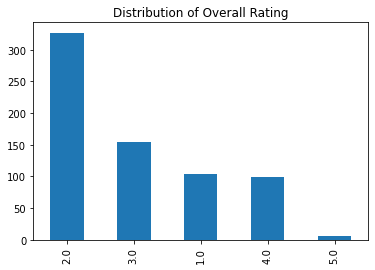

In [18]:
df.q01_overall.value_counts().plot(kind='bar', title="Distribution of Overall Rating")

**All groups but "barely making it" represented. "doing OK" is overepresented. Data should really be in catagories rather than represented numerically.**

## Financial Wellbeing

In [19]:
df.q02_financial.value_counts()

1.0    314
2.0    235
3.0     75
4.0     51
5.0     12
Name: q02_financial, dtype: int64

<AxesSubplot:title={'center':'Distribution of Financial Rating'}>

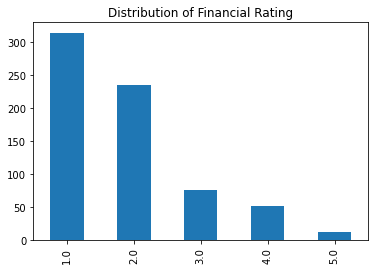

In [20]:
df.q02_financial.value_counts().plot(kind='bar', title="Distribution of Financial Rating")

**All groups but "barely making it" represented. Data should really be in catagories rather than represented numerically.**

In [21]:
df[['q06_birthdoula','q06_postpartumdoula', 'q06_lactation', 'q06_mentalhealth',
       'q06_social', 'q06_diapers', 'q06_formula', 'q06_food', 'q06_housing',
       'q06_transportation', 'q06_healthinsurance', 'q06_financial',
       'q06_covid19education', 'q06_support_none']]

,q06_birthdoula,q06_postpartumdoula,q06_lactation,q06_mentalhealth,q06_social,q06_diapers,q06_formula,q06_food,q06_housing,q06_transportation,q06_healthinsurance,q06_financial,q06_covid19education,q06_support_none
0,NaN,Postpartum Doula Support,Breastfeeding or Lactation Support,NaN,"Social Support - i.e. connections with family,...",NaN,NaN,NaN,NaN,NaN,Health Insurance Coverage,NaN,Education/Informational Resources related to C...,NaN
1,NaN,NaN,Breastfeeding or Lactation Support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education/Informational Resources related to C...,NaN
2,NaN,Postpartum Doula Support,Breastfeeding or Lactation Support,Mental Health Support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education/Informational Resources related to C...,NaN
3,NaN,NaN,Breastfeeding or Lactation Support,Mental Health Support,"Social Support - i.e. connections with family,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Postpartum Doula Support,NaN,NaN,"Social Support - i.e. connections with family,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,NaN,Postpartum Doula Support,Breastfeeding or Lactation Support,Mental Health Support,"Social Support - i.e. connections with family,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
708,NaN,NaN,NaN,Mental Health Support,"Social Support - i.e. connections with family,...",NaN,NaN,NaN,NaN,NaN,NaN,Financial Support,NaN,NaN
709,NaN,Postpartum Doula Support,Breastfeeding or Lactation Support,Mental Health Support,"Social Support - i.e. connections with family,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,NaN,NaN,NaN,NaN,"Social Support - i.e. connections with family,...",NaN,NaN,NaN,NaN,NaN,Health Insurance Coverage,Financial Support,NaN,NaN


In [22]:
cols = ['q06_birthdoula','q06_postpartumdoula', 'q06_lactation', 'q06_mentalhealth',
       'q06_social', 'q06_diapers', 'q06_formula', 'q06_food', 'q06_housing',
       'q06_transportation', 'q06_healthinsurance', 'q06_financial',
       'q06_covid19education', 'q06_support_none']

for col in cols:

    print(df[[col]].value_counts())

q06_birthdoula     
Birth Doula Support    153
dtype: int64
q06_postpartumdoula     
Postpartum Doula Support    254
dtype: int64
q06_lactation                     
Breastfeeding or Lactation Support    271
dtype: int64
q06_mentalhealth     
Mental Health Support    375
dtype: int64
q06_social                                                       
Social Support - i.e. connections with family, friends, and peers    487
dtype: int64
q06_diapers      
Access to Diapers    55
dtype: int64
q06_formula      
Access to Formula    43
dtype: int64
q06_food   
Food Access    45
dtype: int64
q06_housing    
Housing Support    20
dtype: int64
q06_transportation
Transportation        9
dtype: int64
q06_healthinsurance      
Health Insurance Coverage    72
dtype: int64
q06_financial    
Financial Support    117
dtype: int64
q06_covid19education                                 
Education/Informational Resources related to COVID-19    151
dtype: int64
q06_support_none 
No Support Needed    39
dtype: 

In [23]:
df.duration.describe()

count      712.000000
mean       -34.675562
std        506.979140
min     -13391.000000
25%         -9.000000
50%         -6.000000
75%         -4.000000
max         -1.000000
Name: duration, dtype: float64

## Examining qualitative data for fitness in persona description

In [24]:
df.columns

Index(['respondent_id', 'collector_id', 'start', 'end', 'zip', 'q01_overall',
       'q01_overall_open', 'q02_financial', 'q02_financial_open',
       'q03_pregnancy_open', 'q04_feeding_open', 'q05_needs_1st',
       'q05_needs_2nd', 'q05_needs_3rd', 'q06_birthdoula',
       'q06_postpartumdoula', 'q06_lactation', 'q06_mentalhealth',
       'q06_social', 'q06_diapers', 'q06_formula', 'q06_food', 'q06_housing',
       'q06_transportation', 'q06_healthinsurance', 'q06_financial',
       'q06_covid19education', 'q06_support_none', 'q06_support_other',
       'q08_hispanic', 'q09_gender', 'q11_open', 'duration', 'pregnancy_stage',
       'miscarriage', 'race', 'income'],
      dtype='object')

In [25]:
df_qual= df[['q01_overall_open','q02_financial_open','q03_pregnancy_open', 'q04_feeding_open', 
           'q05_needs_1st','q05_needs_2nd', 'q05_needs_3rd', 'q06_support_other',
           'q11_open']]

In [26]:
df_qual.isnull().sum()

q01_overall_open      653
q02_financial_open    663
q03_pregnancy_open     57
q04_feeding_open       96
q05_needs_1st         243
q05_needs_2nd         344
q05_needs_3rd         473
q06_support_other     686
q11_open              561
dtype: int64

In [27]:
df_qual.count()

q01_overall_open       59
q02_financial_open     49
q03_pregnancy_open    655
q04_feeding_open      616
q05_needs_1st         469
q05_needs_2nd         368
q05_needs_3rd         239
q06_support_other      26
q11_open              151
dtype: int64

**We have a lot of null values in the data**

In [28]:
cats = ['race', 'pregnancy_stage', 'income']

## Value counts of 'q01_overall_open' 

In [29]:
df = pd.read_excel('survey_data.xlsx')

for cat in cats:
    
    df = df.dropna(subset=['q01_overall_open'])
    
    print(df[[cat]].value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

race            
White               51
Undisclosed          3
Asian                2
Multiracial          2
Pacific Islander     1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
pregnancy_stage
1 year             32
3rd trimester       7
2 years             6
2nd trimester       6
multi               6
1st trimester       1
caregiver           1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
income           
125,001 and over     16
40,001 - 75,000      15
100,001 - 125,000    12
75,001 - 100,000     12
40,000 and under      1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Value counts of 'q02_financial_open'

In [30]:
df = pd.read_excel('survey_data.xlsx')

for cat in cats:
    
    df = df.dropna(subset=['q02_financial_open'])
    
    print(df[[cat]].value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

race       
White          43
Undisclosed     3
Asian           2
Multiracial     1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
pregnancy_stage
1 year             26
3rd trimester       7
2 years             6
multi               5
2nd trimester       4
1st trimester       1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
income           
125,001 and over     15
40,001 - 75,000      15
100,001 - 125,000    10
75,001 - 100,000      5
40,000 and under      1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Value counts of 'q03_pregnancy_open' == Usefull

In [31]:
df = pd.read_excel('survey_data.xlsx')

for cat in cats:
    
    df = df.dropna(subset=['q03_pregnancy_open'])
    
    print(df[cat].value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

White                 512
Black                  41
Asian                  36
Undisclosed            33
Multiracial            21
Hispanic or Latino      6
American Indian         3
Pacific Islander        3
Name: race, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 year           382
3rd trimester     83
2 years           66
2nd trimester     62
multi             44
1st trimester     12
caregiver          6
Name: pregnancy_stage, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
125,001 and over     238
75,001 - 100,000     115
100,001 - 125,000    105
40,001 - 75,000      104
40,000 and under      53
$40,000 or under       1
Name: income, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# value counts of 'q04_feeding_open' == Usefull

In [32]:
df = pd.read_excel('survey_data.xlsx')

for cat in cats:
    
    df = df.dropna(subset=['q04_feeding_open'])
    
    print(df[[cat]].value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

race              
White                 496
Black                  38
Asian                  36
Multiracial            18
Undisclosed            17
Hispanic or Latino      5
American Indian         3
Pacific Islander        3
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
pregnancy_stage
1 year             363
3rd trimester       77
2nd trimester       59
2 years             58
multi               42
1st trimester       11
caregiver            6
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
income           
125,001 and over     234
75,001 - 100,000     113
100,001 - 125,000     99
40,001 - 75,000       99
40,000 and under      47
$40,000 or under       1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Value counts for 'q06_support_other'

In [33]:
df = pd.read_excel('survey_data.xlsx')

for cat in cats:
    
    df = df.dropna(subset=['q06_support_other'])
    
    print(df[[cat]].value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

race       
White          23
Asian           2
Multiracial     1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
pregnancy_stage
1 year             16
2 years             5
3rd trimester       3
2nd trimester       2
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
income           
125,001 and over     10
100,001 - 125,000     7
40,001 - 75,000       3
40,000 and under      2
75,001 - 100,000      2
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# value counts for 'q11_open' == Maybe Usefull

In [34]:
df = pd.read_excel('survey_data.xlsx')

for cat in cats:
    
    df = df.dropna(subset=['q11_open'])
    
    print(df[[cat]].value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

race              
White                 127
Black                   8
Asian                   6
Multiracial             5
Hispanic or Latino      2
Pacific Islander        2
Undisclosed             1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
pregnancy_stage
1 year             84
3rd trimester      22
multi              16
2 years            15
2nd trimester      12
1st trimester       2
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
income           
125,001 and over     49
75,001 - 100,000     29
100,001 - 125,000    25
40,001 - 75,000      25
40,000 and under     17
$40,000 or under      1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Pregnancy and Feeding are the only two qualitative features with large enough represintation to be useful in creating persona's. The open features has some borderline cases.

## preparing qualitative data for analysis

In [35]:
# get fresh df
df = pd.read_excel('survey_data.xlsx')

# get preped data for each qualitative feature dropping all rows that are nan in that feature
# dropping other qualitative features and persona non-relavent columns
df_q1 = p.get_qual_preped(df,'q01_overall_open')
df_q2 = p.get_qual_preped(df,'q02_financial_open')
df_q3 = p.get_qual_preped(df,'q03_pregnancy_open')  # usefull
df_q4 = p.get_qual_preped(df,'q04_feeding_open')    # usefull
df_q6 = p.get_qual_preped(df,'q06_support_other')
df_q11 = p.get_qual_preped(df,'q11_open')           # might be usefull

In [36]:
df = pd.read_excel('survey_data.xlsx')
race_set = set(df.race.to_list())
race_set

{'American Indian',
 'Asian',
 'Black',
 'Hispanic or Latino',
 'Multiracial',
 'Pacific Islander',
 'Undisclosed',
 'White'}

In [37]:
df_q3[df_q3.race == 'White'][['q03_pregnancy_open']]

,q03_pregnancy_open
0,understanding transmission covid safely intera...
2,get covid hospitalized
3,hate restriction quarantine week delivered wea...
4,becoming sick covid unable care baby
5,baby able socialize nearly anyone afraid lack ...
...,...
707,isolation
708,help ha placed everything afraid send oldest s...
709,avoiding getting covid family much unknown kno...
710,concerned potential risk baby


In [38]:
df_list = [df_q1, df_q2, df_q3, df_q4, df_q6, df_q11]

for df in df_list:
    
    print(df.race.value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

White               51
Undisclosed          3
Asian                2
Multiracial          2
Pacific Islander     1
Name: race, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
White          43
Undisclosed     3
Asian           2
Multiracial     1
Name: race, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
White                 512
Black                  41
Asian                  36
Undisclosed            33
Multiracial            21
Hispanic or Latino      6
American Indian         3
Pacific Islander        3
Name: race, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
White                 496
Black                  38
Asian                  36
Multiracial            18
Undisclosed            17
Hispanic or Latino      5
American Indian         3
Pacific Islander        3
Name: race, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

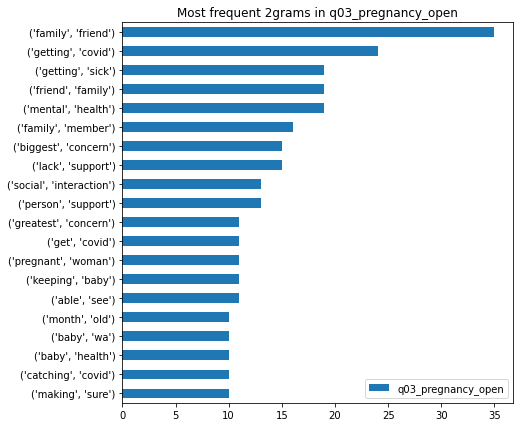

In [42]:
q3_bigrams = e.get_ngram_value_counts(df_q3,'q03_pregnancy_open',2)

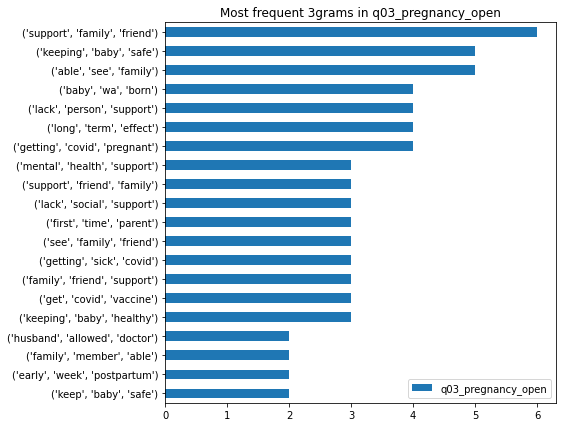

In [39]:
q3_bigrams = e.get_ngram_value_counts(df_q3,'q03_pregnancy_open',3)

In [40]:
def  get_master_list(ngram_lists):
    
    master_ngram_list = []

    for lst in ngram_lists:
        for item in lst:
            master_ngram_list.append(item)
            
    return master_ngram_list


def ngrams_race(df,col,n,sort_by="All"):
    '''
    '''

    # convert text in text column values to a list of bigrams for the full text column and for values representing each color
    ngram_all = df[col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    ngram_white = df[df.race == 'White'][col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    ngram_american_indian = df[df.race == 'American Indian'][col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    ngram_asian = df[df.race == 'Asian'][col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    ngram_black = df[df.race == 'Black'][col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    ngram_hispanic_latino = df[df.race == 'Hispanic or Latino'][col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    ngram_multiracial = df[df.race == 'Multiracial'][col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    ngram_pacific_islander = df[df.race == 'Pacific Islander'][col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    ngram_undisclosed = df[df.race == 'Undisclosed'][col].apply(lambda text: list(nltk.ngrams(text.split(),n)))
    
    # combine lists in series into one master list
    ngram_all_master_list = get_master_list(ngram_all)
    ngram_white_master_list = get_master_list(ngram_white)
    ngram_american_indian_master_list = get_master_list(ngram_american_indian)
    ngram_asian_master_list = get_master_list(ngram_asian)
    ngram_black_master_list = get_master_list(ngram_black)
    ngram_hispanic_latino_master_list = get_master_list(ngram_hispanic_latino)
    ngram_multiracial_master_list = get_master_list(ngram_multiracial)
    ngram_pacific_islander_master_list = get_master_list(ngram_pacific_islander)
    ngram_undisclosed_master_list = get_master_list(ngram_undisclosed)

    # convert each master list to a series then convert each of those tuples into strings
    ngram_all_series = pd.Series(ngram_all_master_list).apply(lambda tup: str(tup))
    ngram_white_series = pd.Series(ngram_white_master_list).apply(lambda tup: str(tup))
    ngram_american_indian_series = pd.Series(ngram_american_indian_master_list).apply(lambda tup: str(tup))
    ngram_asian_series = pd.Series(ngram_asian_master_list).apply(lambda tup: str(tup))
    ngram_black_series = pd.Series(ngram_black_master_list).apply(lambda tup: str(tup))
    ngram_hispanic_latino_series = pd.Series(ngram_hispanic_latino_master_list).apply(lambda tup: str(tup))
    ngram_multiracial_series = pd.Series(ngram_multiracial_master_list).apply(lambda tup: str(tup))
    ngram_pacific_islander_series = pd.Series(ngram_pacific_islander_master_list).apply(lambda tup: str(tup))
    ngram_undisclosed_series = pd.Series(ngram_undisclosed_master_list).apply(lambda tup: str(tup))

    # get value count for each string tuple in the series
    ngram_all_freq = ngram_all_series.value_counts()
    ngram_white_freq = ngram_white_series.value_counts()
    ngram_american_indian_freq = ngram_american_indian_series.value_counts()
    ngram_asian_freq = ngram_asian_series.value_counts()
    ngram_black_freq = ngram_black_series.value_counts()
    ngram_hispanic_latino_freq = ngram_hispanic_latino_series.value_counts()
    ngram_multiracial_freq = ngram_multiracial_series.value_counts()
    ngram_pacific_islander_freq = ngram_pacific_islander_series.value_counts()
    ngram_undisclosed_freq = ngram_undisclosed_series.value_counts()
    
    # combine value counts into one pandas data frame                                        
    ngram_counts = (pd.concat([ngram_all_freq,ngram_white_freq,ngram_american_indian_freq,ngram_asian_freq,ngram_black_freq,
                               ngram_hispanic_latino_freq,ngram_multiracial_freq,ngram_pacific_islander_freq,
                               ngram_undisclosed_freq], axis=1, sort=True)
                      .set_axis(["All","White","American Indian","Asian","Black","Hispanic or Latino","Multiracial",
                           "Pacific Islander","Undisclosed"], axis=1, inplace=False)
                      .fillna(0)
                      .apply(lambda s: s.astype(int))
                      .sort_values(by=sort_by,ascending=False)
                      .head(20))
                
    return ngram_counts
    
    #     # convert to dataframe
    #     ngram_white_frame = ngram_white_freq.to_frame(name="White")
    #     ngram_american_indian_frame = ngram_american_indian_freq.to_frame(name="American Indian")
    #     ngram_asian_frame = ngram_asian_freq.to_frame(name="Asian")
    #     ngram_black_frame = ngram_black_freq.to_frame(name="Black")
    #     ngram_hispanic_latino_frame = ngram_hispanic_latino_freq.to_frame(name="Hispanic or Latino")
    #     ngram_multiracial_frame = ngram_multiracial_freq.to_frame(name="Multiracial")
    #     ngram_pacific_islander_frame = ngram_pacific_islander_freq.to_frame(name="Pacific Islander")
    #     ngram_undisclosed_frame = ngram_white_freq.to_frame(name="Undisclosed")

    #     # make a bar chart if chart equals True
    #     if chart == True:

    #         ngram_frame.sort_values(by=col).tail(20).plot.barh(figsize=(7,7))
    #         plt.title(f"Most frequent {n}grams in {col}")

    #     # return dataframe if return_df equals True
    #     if return_df == True:

    

In [41]:
ngrams_race(df_q3,'q03_pregnancy_open',2)

,All,White,American Indian,Asian,Black,Hispanic or Latino,Multiracial,Pacific Islander,Undisclosed
"('family', 'friend')",35,29,0,2,4,0,0,0,0
"('getting', 'covid')",24,20,0,1,0,0,2,0,1
"('friend', 'family')",19,18,0,0,0,0,0,0,1
"('mental', 'health')",19,15,0,2,1,0,0,0,1
"('getting', 'sick')",19,15,0,0,0,0,2,0,2
"('family', 'member')",16,11,1,1,1,1,1,0,0
"('biggest', 'concern')",15,11,0,0,0,1,3,0,0
"('lack', 'support')",15,13,0,1,0,0,0,0,1
"('social', 'interaction')",13,12,0,0,1,0,0,0,0
"('person', 'support')",13,11,0,0,2,0,0,0,0
